In [32]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer


ruta = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/dataset_preprocesado/dataset_abstract_preprocesado.csv"

datos = pd.read_csv(ruta)
#print(datos)

textos = datos['abstract_limpio'].tolist()
etiquetas = datos['cat_one_hot']

In [26]:
from tqdm import tqdm
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
ruta_modelo = "F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Implementacion_Roberta/roberta_model_classification_100_epochs/roberta_model_classification_100_epochs/roberta_modelo_almacenado_100_epocas"  # Reemplaza "ruta/a/tu/modelo" con la ubicación real de tu modelo
modelo = AutoModelForSequenceClassification.from_pretrained(ruta_modelo)
tokenizer = AutoTokenizer.from_pretrained(ruta_modelo,max_length=512)

def crear_embeddings(tokenizer,texto):
    tokens = tokenizer.encode(texto, add_special_tokens=True, return_tensors="pt",truncation=True)
    with torch.no_grad():
        outputs = modelo(tokens)
        logits = outputs.logits
    embeddings_texto= logits
    return embeddings_texto

lista_embeddings = []
for texto in tqdm(textos, desc="Creando embeddings:"):
    embedding = crear_embeddings(tokenizer,texto)
    lista_embeddings.append(embedding[0])    


Creando embeddings:: 100%|█████████████████████████████████████████████████████████| 7750/7750 [13:38<00:00,  9.47it/s]


In [29]:
from sklearn.decomposition import PCA

n_components = 2

pca = PCA(n_components=n_components)
pca_matrix = pca.fit_transform(lista_embeddings)
print(pca_matrix)

import os

# Obtener el directorio actual
directorio_actual = os.getcwd()

print("El directorio actual es:", directorio_actual)

[[-3.77211073 -6.36349555]
 [-3.92832929 -6.31017339]
 [-3.91297819 -6.26251691]
 ...
 [-4.38376451  0.44786053]
 [-4.27185723  0.56168364]
 [-4.34562281  0.42921162]]
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Implementacion_Roberta


<>:30: SyntaxWarning: invalid escape sequence '\P'
<>:30: SyntaxWarning: invalid escape sequence '\P'
C:\Users\David Soto\AppData\Local\Temp\ipykernel_30028\1250931989.py:30: SyntaxWarning: invalid escape sequence '\P'
  directorio_actual = directorio_actual + "\PCA_roberta_embedding.png"


7750


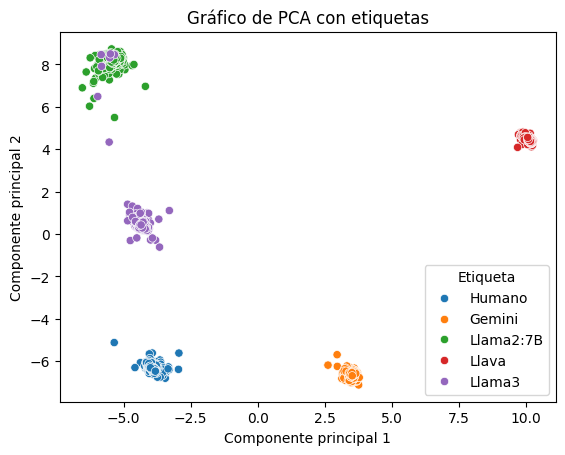

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

pca_values = pca_matrix  # Esto es solo un ejemplo, asegúrate de tener tus valores PCA correctamente
etiquetas1 = etiquetas  # Asegúrate de tener tus etiquetas correctamente
nuevas_etiquetas = []
for et in etiquetas:
    if et == "[1, 0, 0, 0, 0]":
        nuevas_etiquetas.append("Humano")
    elif et == "[0, 1, 0, 0, 0]":
        nuevas_etiquetas.append("Gemini")
    elif et == "[0, 0, 1, 0, 0]":
        nuevas_etiquetas.append("Llama2:7B")
    elif et == "[0, 0, 0, 1, 0]":
        nuevas_etiquetas.append("Llava")
    elif et == "[0, 0, 0, 0, 1]":
        nuevas_etiquetas.append("Llama3")

print(len(nuevas_etiquetas))
        
# Crear un DataFrame con los valores PCA y las etiquetas
df = pd.DataFrame({'PC1': pca_values[:, 0], 'PC2': pca_values[:, 1], 'Etiqueta': nuevas_etiquetas})

# Graficar los valores PCA con seaborn
sns.scatterplot(x='PC1', y='PC2', hue='Etiqueta', data=df)
plt.title('Gráfico de PCA con etiquetas')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
# Guardar el gráfico como PNG
directorio_actual = directorio_actual + "\PCA_roberta_embedding.png"
plt.savefig(directorio_actual)
plt.show()

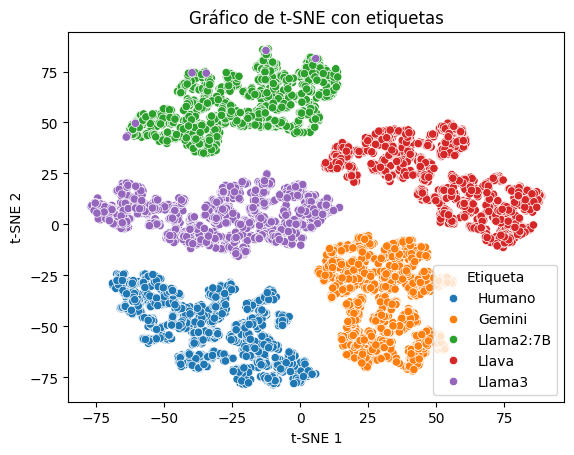

In [34]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tus datos están en la variable datos y las etiquetas en etiquetas
datos = pca_matrix  # Esto es solo un ejemplo, asegúrate de tener tus valores PCA correctamente
etiquetas1 = etiquetas  # Asegúrate de tener tus etiquetas correctamente

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
datos_tsne = tsne.fit_transform(datos)

# Crear un DataFrame con los valores t-SNE y las etiquetas
df = pd.DataFrame({'TSNE1': datos_tsne[:, 0], 'TSNE2': datos_tsne[:, 1], 'Etiqueta': nuevas_etiquetas})

# Graficar los valores t-SNE con seaborn
sns.scatterplot(x='TSNE1', y='TSNE2', hue='Etiqueta', data=df)
plt.title('Gráfico de t-SNE con etiquetas')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
# Obtener el directorio actual
directorio_actual = os.getcwd()
directorio_actual = directorio_actual + "\\t_SNE_Roberta_embedding.png"
plt.savefig(directorio_actual)
plt.show()